In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!jt -r

<h1><center>Predition of Vertical Heights </center></h1>

In [300]:
data=pd.read_excel("trial_data4.xlsx")

### DATA - (H08 grid)
#### Here is the First five rows of Raw Data

In [301]:
data.head()

,fid,hex_id,stats_ndvi_mean,stats_ndbi__mean,stats_albedo__mean,stats_gaia__mean,stats_ntl__mean,stats_pop__sum,stats_s1_vh__mean,stats_s1_vv__mean,h8_heights_mean
0,1,883da119c3fffff,0.170212,-0.055115,0.270056,5.526425,18.005763,2943.907908,5.037355,-7.301261,NaN
1,2,883da152c7fffff,0.313376,-0.163804,0.282464,0.042918,2.321780,213.499294,6.868471,-9.923065,NaN
2,3,883da15247fffff,0.310833,-0.166947,0.276044,0.060543,2.244044,231.787892,7.228392,0.000617,NaN
3,5,883da1c807fffff,0.329162,-0.148548,0.284163,0.000000,1.372867,124.559775,6.389990,-9.538286,NaN
4,6,883da1c087fffff,0.291662,-0.141830,0.281350,1.886481,1.710714,449.240675,6.499904,-9.415530,NaN


#### Removing two attributes fid and hex_id 

In [302]:
data=data.iloc[:,2:]

### Data info
#### Here we find that we have total 1692 data points but in target variable we have only 42 data points in
#### h8_height_mean so we go with only that 42 rows

In [303]:
"""we go with only that 42 rows """
df_test=data[data["h8_heights_mean"].isnull()==False]

<h1><center>EDA<center></h1>

#### Data Select for the EDA AND MODEL BUILDING

In [304]:
print("Shape of_working data:- ", df_test.shape,"\n")
print("No of null values","\n", df_test.isnull().sum())


Shape of_working data:-  (42, 9) 

No of null values 
 stats_ndvi_mean       0
stats_ndbi__mean      0
stats_albedo__mean    0
stats_gaia__mean      0
stats_ntl__mean       0
stats_pop__sum        0
stats_s1_vh__mean     0
stats_s1_vv__mean     0
h8_heights_mean       0
dtype: int64


#### DATA DESCRIPTION

In [305]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
stats_ndvi_mean,42.0,0.116043,0.036806,0.056182,0.089902,0.113100,0.136115,0.221824
stats_ndbi__mean,42.0,-0.053438,0.012467,-0.091127,-0.061075,-0.053613,-0.043934,-0.031161
stats_albedo__mean,42.0,0.245806,0.007630,0.231249,0.239849,0.244899,0.251454,0.265751
stats_gaia__mean,42.0,19.036494,4.958352,5.986570,15.456338,20.087281,23.070692,27.314109
stats_ntl__mean,42.0,31.879844,10.423049,15.532143,22.309851,33.053216,35.736646,61.387144
stats_pop__sum,42.0,5391.886685,1487.381346,2006.544196,4324.157978,5301.963496,6349.174518,8773.138492
stats_s1_vh__mean,42.0,1.593661,3.274509,-9.922030,1.788076,2.334195,2.981169,4.354035
stats_s1_vv__mean,42.0,-5.427955,1.141130,-7.508700,-6.136148,-5.696110,-4.803029,-2.346491
h8_heights_mean,42.0,4.466398,4.385287,3.000000,3.000000,3.001445,4.383085,29.709091


### Line charts of to show the similarity in pattern with tha data target variable 

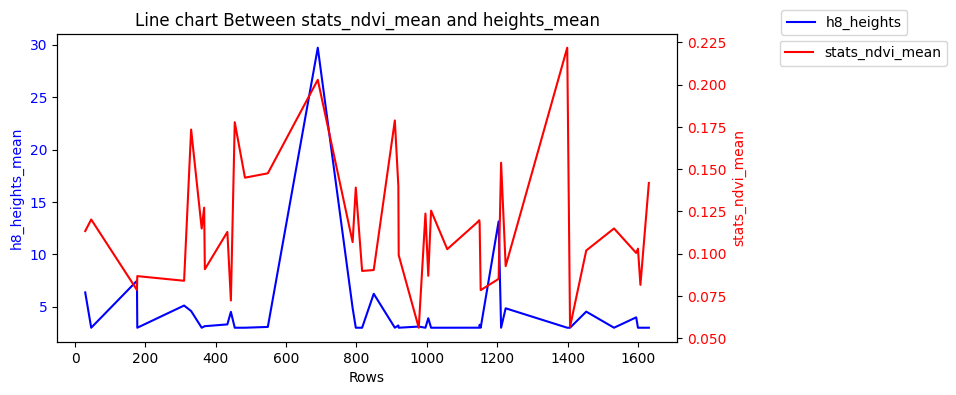

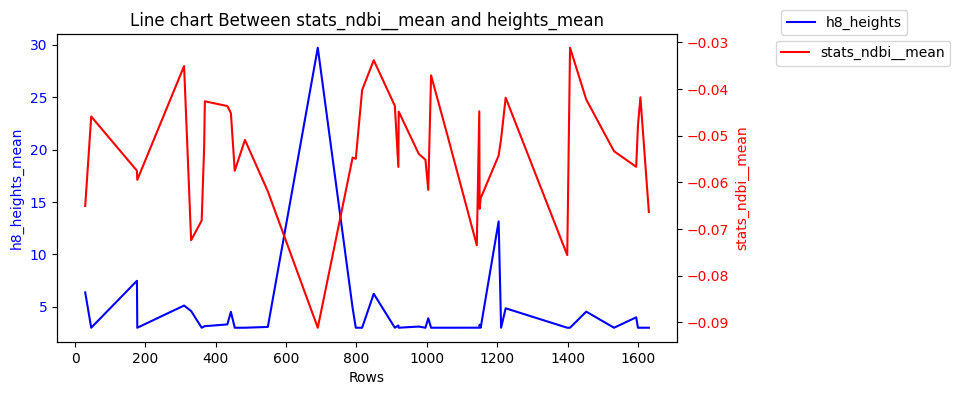

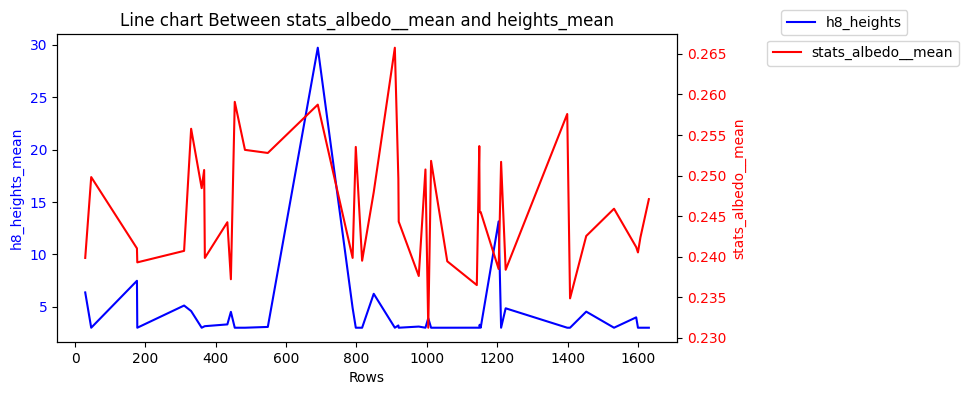

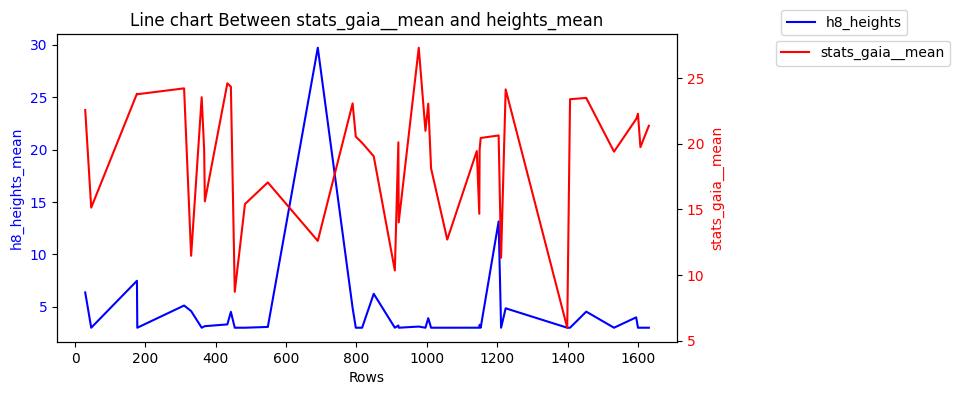

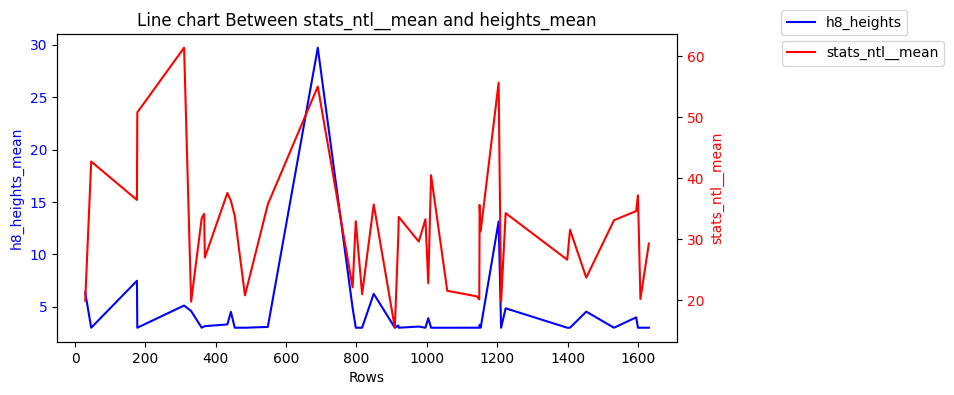

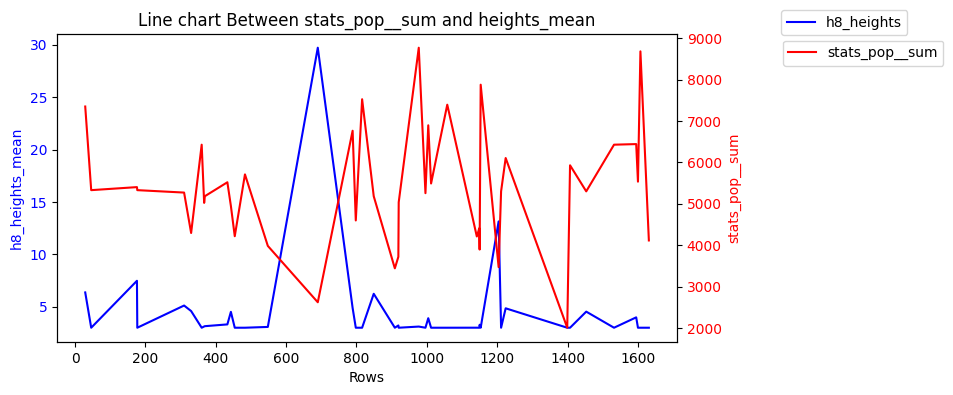

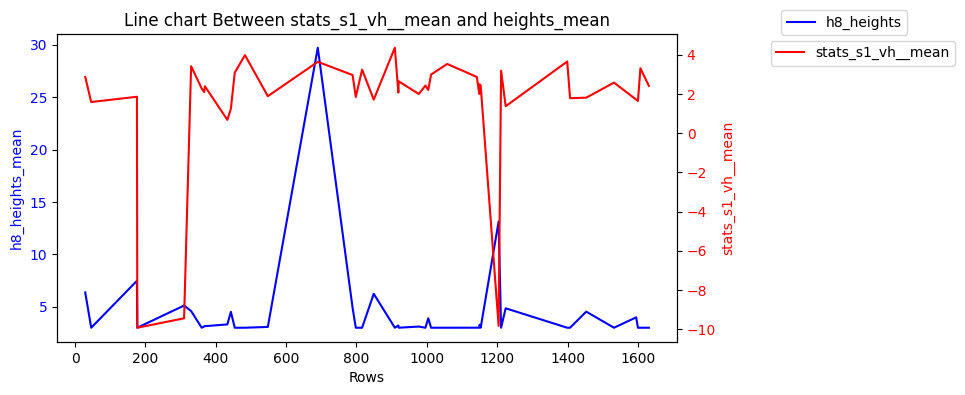

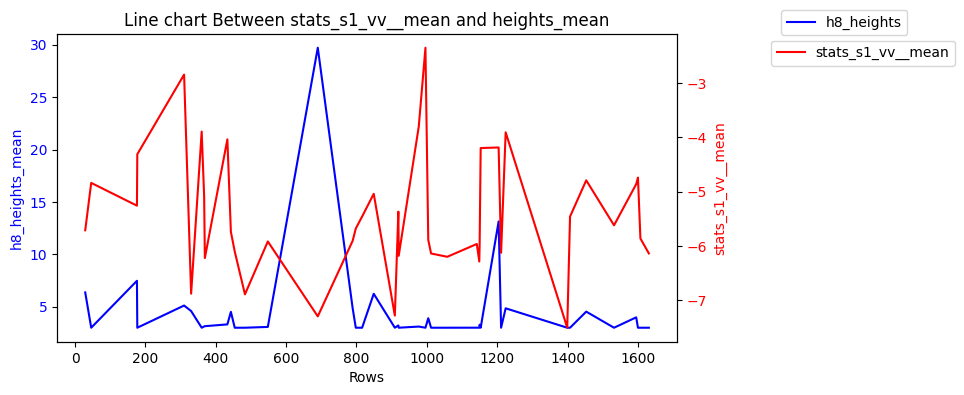

In [361]:
for i in df_test.columns[:-1]:
    fig, ax1 = plt.subplots(figsize=(8,4))
    ax1.plot(df_test["h8_heights_mean"], color='blue',label="h8_heights")
    ax1.set_ylabel("h8_heights_mean", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    plt.legend(bbox_to_anchor=(1.27, 1.1), loc='upper center')
   

    ax2 = ax1.twinx()
    ax2.plot(df_test[i] , color='red',label=i)
    #ax2.set_ylim(0, 1)  # set the range for the second axis
    ax2.set_ylabel(i, color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    plt.legend(bbox_to_anchor=(1.3, 1.0), loc='upper center')
    
   
    
    ax1.set_xlabel('Rows')
    ax1.set_title(f'Line chart Between {i} and heights_mean')
    


#### Here is the boxplot which shows  outlier present in each column but s1_vh_mean and h8_heights_mean have more outlier

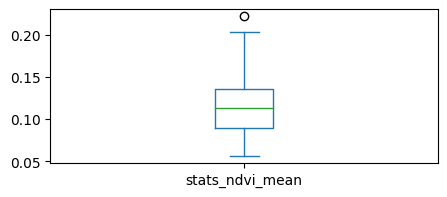

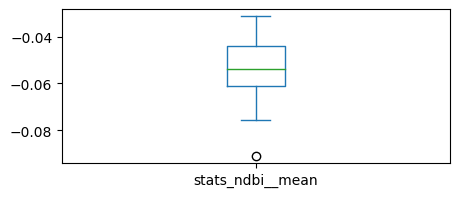

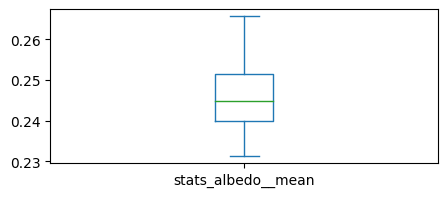

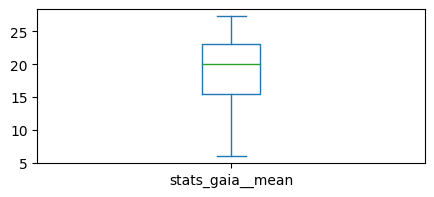

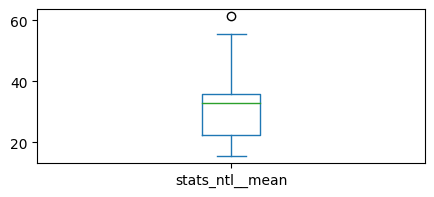

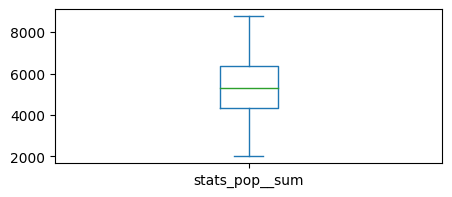

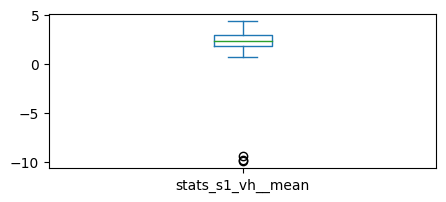

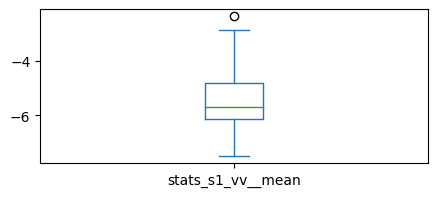

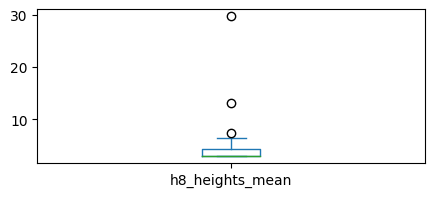

In [310]:
for i in df_test.columns:
    plt.figure(figsize=(5,2))
    df_test[i].plot(kind="box")
    #there is some outlier in  s1_vh_mean and h8_heights_mean

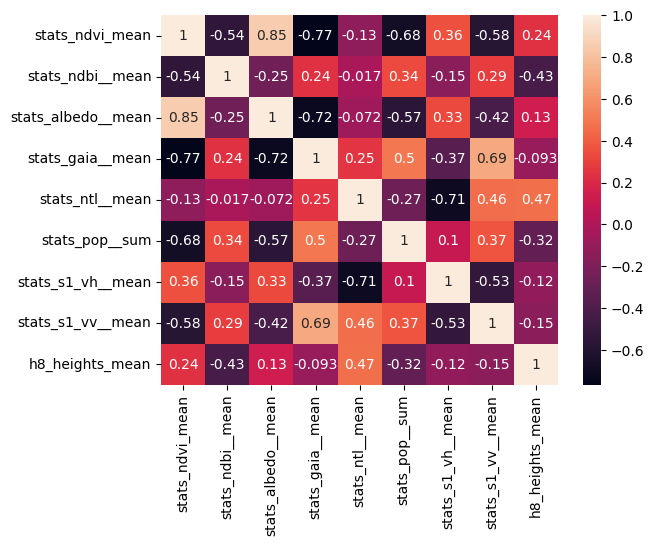

In [322]:
sns.heatmap(df_test.corr(),annot=True)
plt.show()
# There is highest positive correlation btw albedo_mean & ndvi_mean 
# There is highest negative correlation btw gaib_mean and h8_heights_mean

### Scatter plot shows the distribution of column with respect to height

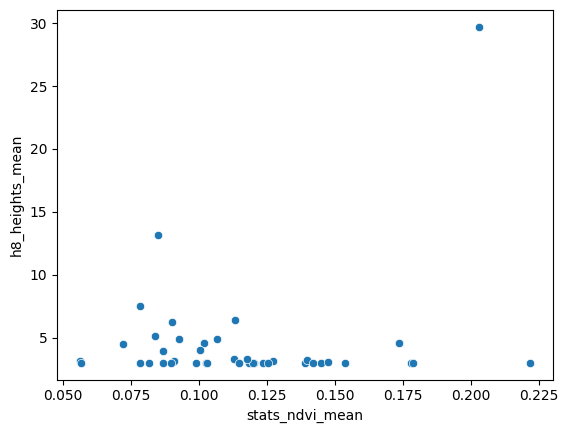

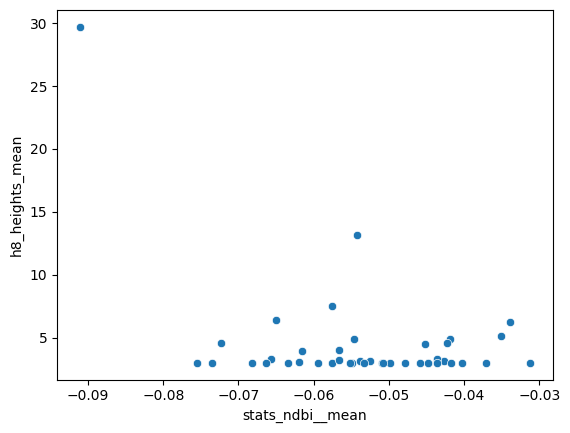

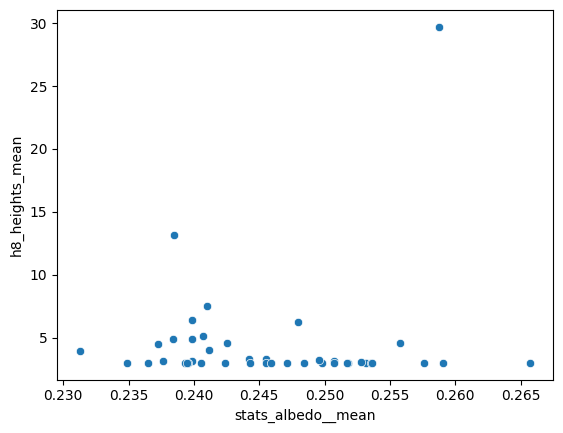

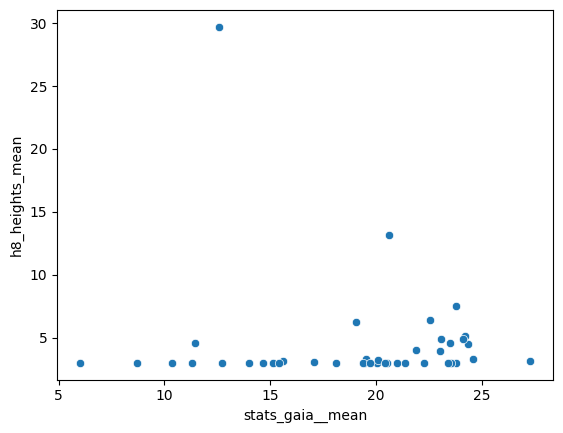

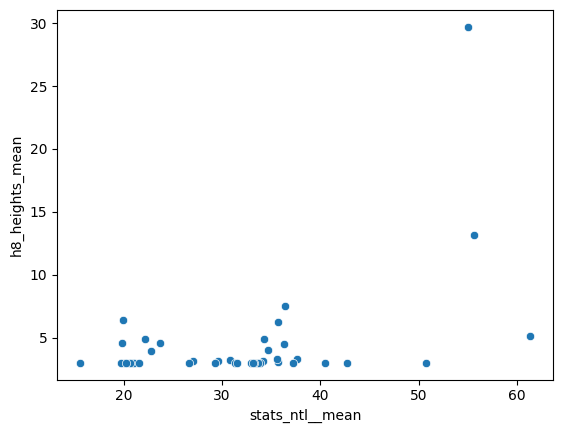

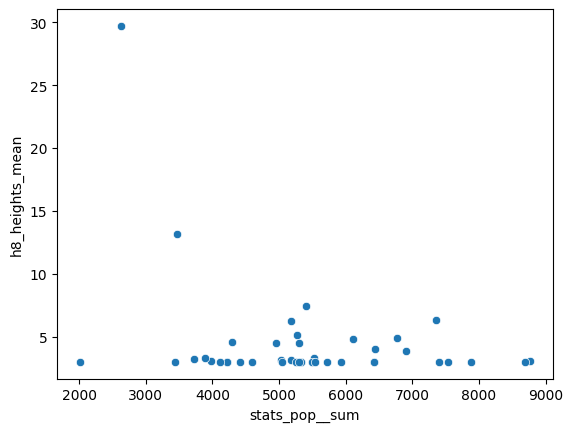

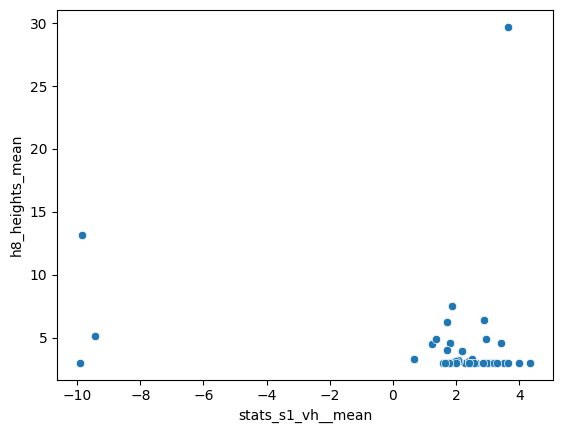

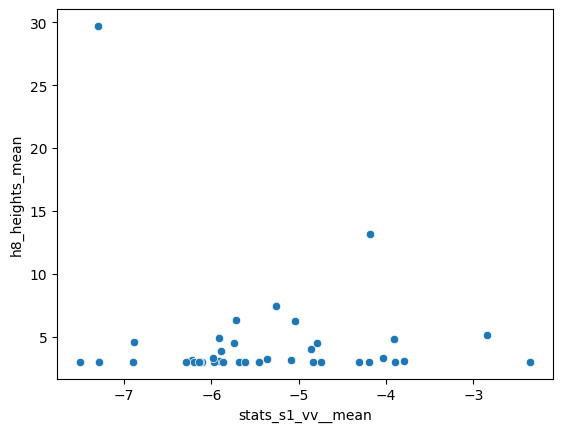

In [312]:
for i in df_test.columns[:-1]:
    plt.figure()
    sns.scatterplot(x=df_test[i],y=df_test["h8_heights_mean"])

<h1><center>Model Building<center></h1>

## Linear Regression

In [313]:
x=df_test.iloc[:,:-1]
y=df_test.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [315]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [316]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [317]:
y_predict_train=model.predict(x_train)
y_predict_test=model.predict(x_test)

#### RESULT OF LINEAR REGRESSION 

In [318]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('mean Absolute error_of_train: ', metrics.mean_absolute_error(y_train,y_predict_train))
print('mean Absolute error_of_test: ', metrics.mean_absolute_error(y_test,y_predict_test))
print('mean squared error_of_train: ', metrics.mean_squared_error(y_train,y_predict_train))
print('mean squared error_of_test: ' , metrics.mean_squared_error(y_test,y_predict_test))
print('root mean Absolute error_of_train: ', np.sqrt(metrics.mean_squared_error(y_train,y_predict_train)))
print('root mean Absolute error_of_test: ', np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))
print("r2_on_train: ", r2_score(y_train,y_predict_train))
print("r2_on_test:  ", r2_score(y_test,y_predict_test))

mean Absolute error_of_train:  2.231450280904275
mean Absolute error_of_test:  3.3367902702657513
mean squared error_of_train:  8.435381582601591
mean squared error_of_test:  15.422359230331956
root mean Absolute error_of_train:  2.9043728380842553
root mean Absolute error_of_test:  3.927131170502452
r2_on_train:  0.5964383116868283
r2_on_test:   -0.4124120461487004


In [320]:
#y_predict_test

### Original_height vs Predicted height 

In [321]:
com_org_vs_pre=pd.DataFrame({"original_height":y_test,"predicted_height":y_predict_test})
com_org_vs_pre.reset_index(drop=True,inplace=True)
com_org_vs_pre

,original_height,predicted_height
0,3.000000,7.136126
1,7.477440,7.210209
2,3.000000,-1.938260
3,3.000000,4.830585
4,3.000000,0.364672
5,3.284706,8.279141
6,3.000000,-1.311451
7,3.000000,2.662019
8,13.139955,6.560239


### Comparision btw Original_height vs Predicted height 

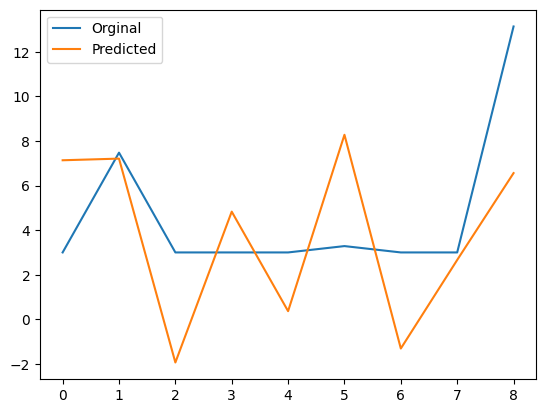

In [323]:
plt.figure
com_org_vs_pre["original_height"].plot(label="Orginal")
com_org_vs_pre["predicted_height"].plot(label="Predicted")
plt.legend()
plt.show()

# RandomForest

In [324]:
x=df_test.iloc[:,:-1]
y=df_test.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [326]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [327]:
from sklearn.ensemble import RandomForestRegressor
model_r=RandomForestRegressor(n_estimators=200,max_depth=1,random_state=42)

In [328]:
model_r.fit(x_train,y_train)

RandomForestRegressor(max_depth=1, n_estimators=200, random_state=42)

In [329]:
y_predict_train=model_r.predict(x_train)
y_predict_test=model_r.predict(x_test)

#### RESULT OF Random Forest (Max depth=1,other default)

In [330]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('mean Absolute error_of_train: ', metrics.mean_absolute_error(y_train,y_predict_train))
print('mean Absolute error_of_test: ', metrics.mean_absolute_error(y_test,y_predict_test))
print('mean squared error_of_train: ', metrics.mean_squared_error(y_train,y_predict_train))
print('mean squared error_of_test: ' , metrics.mean_squared_error(y_test,y_predict_test))
print('root mean Absolute error_of_train: ', np.sqrt(metrics.mean_squared_error(y_train,y_predict_train)))
print('root mean Absolute error_of_test: ', np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))
print("r2_on_train: ", r2_score(y_train,y_predict_train))
print("r2_on_test:  ", r2_score(y_test,y_predict_test))

mean Absolute error_of_train:  1.2881038212707099
mean Absolute error_of_test:  2.5384447855803236
mean squared error_of_train:  5.130071643928714
mean squared error_of_test:  12.323547090413484
root mean Absolute error_of_train:  2.264966146309634
root mean Absolute error_of_test:  3.5104910041778323
r2_on_train:  0.754569446145566
r2_on_test:   -0.12861632269255097


### Features's  Importance

In [331]:
pd.DataFrame(df_test.columns)
values=model_r.feature_importances_
pd.DataFrame({"columns_name":df_test.columns[:-1],"feature_importances":values})

,columns_name,feature_importances
0,stats_ndvi_mean,0.18
1,stats_ndbi__mean,0.35
2,stats_albedo__mean,0.13
3,stats_gaia__mean,0.12
4,stats_ntl__mean,0.10
5,stats_pop__sum,0.02
6,stats_s1_vh__mean,0.07
7,stats_s1_vv__mean,0.03


### Original_height vs Predicted height 

In [332]:
com_org_vs_pre=pd.DataFrame({"Original_height":y_test,"Predicted_height":y_predict_test})
com_org_vs_pre.reset_index(drop=True,inplace=True)
com_org_vs_pre

,Original_height,Predicted_height
0,3.000000,5.898932
1,7.477440,3.772629
2,3.000000,3.499441
3,3.000000,3.803523
4,3.000000,3.666836
5,3.284706,3.507870
6,3.000000,8.631582
7,3.000000,4.026935
8,13.139955,5.749175


### Comparision btw Original_height vs Predicted height 

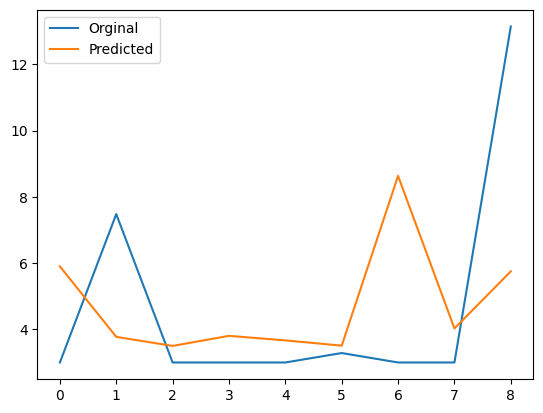

In [333]:
plt.figure
com_org_vs_pre["Original_height"].plot(label="Orginal")
com_org_vs_pre["Predicted_height"].plot(label="Predicted")
plt.legend()
plt.show()

### Find Best fit parameter for Random Forest  By RandomizedSearchCV

In [ ]:

from sklearn.model_selection import RandomizedSearchCV
n_estimators= [int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(start=10,stop=110,num=11)]
# when there is no max_depth it takes none so that the model go to its maximum extent 
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf=[1,2,4]
bootstrap=[True,False]
# Create the random grid
random_grid={'n_estimators': n_estimators , 'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,
            'bootstrap':bootstrap}
random_grid
rf=RandomForestRegressor(random_state=42)
# here cv is cross validation and n_jobs=-1 tell to run all trees simulteniously
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,
                             scoring='neg_mean_absolute_error',cv=3,verbose=2,
                             random_state=42,n_jobs=-1,return_train_score=True)

rf2=rf_random.fit(x_train,y_train);
# by runninng below code we get  the parameter for best model
#print("best parameter",rf2.best_params_)
#y_pred=rf2.predict(x_test)
#print("r2_on_train: ", (y_pred,y_test))
#rf2.cv_results_
#importance=rf2.feature_importances_

In [335]:
print("best parameter",rf2.best_params_)

best parameter {'n_estimators': 1200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}


## Random Forest with after find best parameter

In [336]:
from sklearn.ensemble import RandomForestRegressor
model_r_b=RandomForestRegressor(n_estimators=1200,max_depth=10,min_samples_leaf=2,random_state=42)

In [337]:
model_r_b.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, n_estimators=1200,
                      random_state=42)

In [339]:
y_predict_train=model_r_b.predict(x_train)
y_predict_test=model_r_b.predict(x_test)
#y_predict_test

### Result of Random Forest(with best parameter)

In [340]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('mean Absolute error_of_train: ', metrics.mean_absolute_error(y_train,y_predict_train))
print('mean Absolute error_of_test: ', metrics.mean_absolute_error(y_test,y_predict_test))
print('mean squared error_of_train: ', metrics.mean_squared_error(y_train,y_predict_train))
print('mean squared error_of_test: ' , metrics.mean_squared_error(y_test,y_predict_test))
print('root mean Absolute error_of_train: ', np.sqrt(metrics.mean_squared_error(y_train,y_predict_train)))
print('root mean Absolute error_of_test: ', np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))
print("r2_on_train: ", r2_score(y_train,y_predict_train))
print("r2_on_test:  ", r2_score(y_test,y_predict_test))

mean Absolute error_of_train:  1.241963985268396
mean Absolute error_of_test:  2.3613298088559143
mean squared error_of_train:  10.13773833282041
mean squared error_of_test:  8.898746895619247
root mean Absolute error_of_train:  3.1839815220601406
root mean Absolute error_of_test:  2.983076749870718
r2_on_train:  0.5149949344664526
r2_on_test:   0.18503407142264816


### Features's  Importance

In [341]:
pd.DataFrame(df_test.columns)
values=model_r_b.feature_importances_
pd.DataFrame({"columns_name":df_test.columns[:-1],"feature_importances":values})

,columns_name,feature_importances
0,stats_ndvi_mean,0.112559
1,stats_ndbi__mean,0.116078
2,stats_albedo__mean,0.094469
3,stats_gaia__mean,0.125890
4,stats_ntl__mean,0.330223
5,stats_pop__sum,0.081219
6,stats_s1_vh__mean,0.091923
7,stats_s1_vv__mean,0.047640


### Original_height vs Predicted height 

In [343]:
com_org_vs_pre=pd.DataFrame({"Original_height":y_test,"Predicted_height":y_predict_test})
com_org_vs_pre.reset_index(drop=True,inplace=True)
com_org_vs_pre

,Original_height,Predicted_height
0,3.000000,8.719092
1,7.477440,4.187665
2,3.000000,3.072498
3,3.000000,4.561341
4,3.000000,3.666184
5,3.284706,3.642449
6,3.000000,6.831581
7,3.000000,4.802306
8,13.139955,9.188507


### Comparision btw Original_height vs Predicted height 

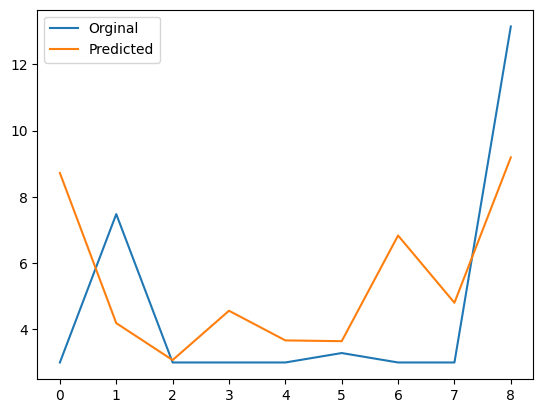

In [344]:
plt.figure
com_org_vs_pre["Original_height"].plot(label="Orginal")
com_org_vs_pre["Predicted_height"].plot(label="Predicted")
plt.legend()
plt.show()